# Assignment 12.1 - Graph Neural Networks

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf.

#### Please state both names of your group members here:
Jane and John Doe

In [1]:
# Paola Gega, Daniel Thompson

## Task 12.1.1: GNNs

* Implement a simple Graph Convolutional Network. **(RESULT)**
* Train and evaluate it on the Cora dataset provided below. **(RESULT)**

Hint: you might need to install torch_geometric first

`pip install torch_geometric`

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv

# Load Cora dataset (citation network: 2708 papers, 7 classes)
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

In [3]:
# Implement GCN model
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [4]:
# Training loop
model = GCN(dataset.num_node_features, 16, dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.NLLLoss()
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')
        
# Evaluation
model.eval()
_, pred = model(data.x, data.edge_index).max(dim=1)
correct = int(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
accuracy = correct / int(data.test_mask.sum())
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 0, Loss: 1.9342
Epoch 10, Loss: 0.7343
Epoch 20, Loss: 0.2176
Epoch 30, Loss: 0.1044
Epoch 40, Loss: 0.0486
Epoch 50, Loss: 0.0336
Epoch 60, Loss: 0.0538
Epoch 70, Loss: 0.0410
Epoch 80, Loss: 0.0324
Epoch 90, Loss: 0.0449
Epoch 100, Loss: 0.0228
Epoch 110, Loss: 0.0344
Epoch 120, Loss: 0.0504
Epoch 130, Loss: 0.0437
Epoch 140, Loss: 0.0347
Epoch 150, Loss: 0.0176
Epoch 160, Loss: 0.0403
Epoch 170, Loss: 0.0224
Epoch 180, Loss: 0.0417
Epoch 190, Loss: 0.0329
Test Accuracy: 0.7910


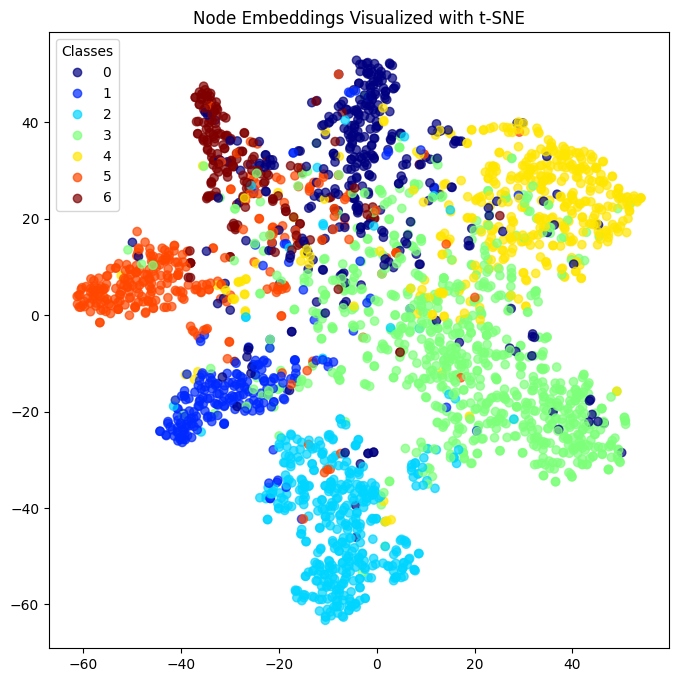

In [5]:
# Visualization of embeddings
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model.eval()
embeddings = model.conv1(data.x, data.edge_index).detach().cpu().numpy()
tsne = TSNE(n_components=2)
emb_2d = tsne.fit_transform(embeddings)
plt.figure(figsize=(8, 8))
scatter = plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=data.y.cpu(), cmap='jet', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Node Embeddings Visualized with t-SNE')
plt.show()

## Congratz, you made it! :)